In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import os
import re
import numpy as np
from urllib.parse import urlparse, parse_qs
import csv
import pandas as pd
!pip install pytrends
from pytrends.request import TrendReq

In [7]:
#fetch the latest brands on air purifiers
# Setting up the Google Trends API
pytrend = TrendReq()

# Setting up the Google Trends API with increased timeout
pytrend = TrendReq(timeout=10)


# Creating a list of accessories and companies
accessory = 'car air purifier'
companies = ['Coway', 'Airspa', 'Kent', 'Sharp', 'Reffair', 'Airfree', 'Philips']

# Creating an empty dataframe to store the trends data
trends_data_ap = pd.DataFrame()

# Looping through each company to get the trends data for the accessory
for company in companies:
    # Building the search query for the accessory and company
    query = accessory + ' ' + company
    
    # Building the payload for the Google Trends API
    pytrend.build_payload(kw_list=[query], timeframe='2021-01-01 2022-12-31')
    
    # Getting the interest over time data for the query
    interest_over_time_df = pytrend.interest_over_time()
    
    # Checking if the 'isPartial' column exists and dropping it if present
    if 'isPartial' in interest_over_time_df.columns:
        interest_over_time_df.drop(columns=['isPartial'], inplace=True)
    
    # Converting the index to a DatetimeIndex
    interest_over_time_df.index = pd.to_datetime(interest_over_time_df.index)
    
    # Resampling the data to monthly intervals
    interest_over_time_df = interest_over_time_df.resample('MS').sum()
    
    # Renaming the column to include the company name
    interest_over_time_df.rename(columns={query: company}, inplace=True)
    
    # Adding the data to the trends data dataframe
    if trends_data_ap.empty:
        trends_data_ap = interest_over_time_df
    else:
        trends_data_ap = pd.concat([trends_data_ap, interest_over_time_df], axis=1)

# Filling missing values with 0
trends_data_ap.fillna(0, inplace=True)
trends_data_ap

,Sharp,Philips
date,,
2021-01-01,145,22
2021-02-01,55,101
2021-03-01,54,20
2021-04-01,19,116
2021-05-01,93,106
2021-06-01,130,159
2021-07-01,24,54
2021-08-01,65,39
2021-09-01,22,46


In [8]:
import pandas as pd
from pytrends.request import TrendReq

# Setting up the Google Trends API
pytrend = TrendReq()

# Setting up the Google Trends API with increased timeout
pytrend = TrendReq(timeout=10)

# Creating a list of accessories and companies
accessory = 'air freshner'
companies = ['Febreze', 'Glade', 'Ambipur', 'Godrej', 'Involve', 'Vista', 'Little Trees', 'Meguiar', 'Fresh Air']

# Creating an empty dataframe to store the trends data
trends_data_af = pd.DataFrame()

# Looping through each company to get the trends data for the accessory
for company in companies:
    # Building the search query for the accessory and company
    query = accessory + ' ' + company
    
    # Building the payload for the Google Trends API
    pytrend.build_payload(kw_list=[query], timeframe='2021-01-01 2022-12-31')
    
    # Getting the interest over time data for the query
    interest_over_time_df = pytrend.interest_over_time()
    
    # Checking if the 'isPartial' column exists and dropping it if present
    if 'isPartial' in interest_over_time_df.columns:
        interest_over_time_df.drop(columns=['isPartial'], inplace=True)
    
    # Converting the index to a DatetimeIndex
    interest_over_time_df.index = pd.to_datetime(interest_over_time_df.index)
    
    # Resampling the data to monthly intervals
    interest_over_time_df = interest_over_time_df.resample('MS').sum()
    
    # Renaming the column to include the company name
    interest_over_time_df.rename(columns={query: company}, inplace=True)
    
    # Adding the data to the trends data dataframe
    if trends_data_af.empty:
        trends_data_af = interest_over_time_df
    else:
        trends_data_af = pd.concat([trends_data_af, interest_over_time_df], axis=1)

# Filling missing values with 0
trends_data_af.fillna(0, inplace=True)
trends_data_af

,Febreze,Glade,Godrej,Little Trees,Fresh Air
date,,,,,
2021-01-01,26,109,22,0,125
2021-02-01,29,49,19,22,119
2021-03-01,72,29,27,84,25
2021-04-01,25,125,122,20,184
2021-05-01,25,42,0,62,38
2021-06-01,37,123,21,129,0
2021-07-01,0,122,31,36,75
2021-08-01,64,169,0,124,117
2021-09-01,61,95,31,0,175


In [12]:
# Print the columns of the trends_data DataFrame
Brands_ap = trends_data_ap.columns
Brands_af = trends_data_af.columns
brand_search_list_ap = []
brand_search_list_af = []
for AP in Brands_ap:
    brand_search_list_ap.append('https://www.flipkart.com/search?q='+AP+'+air+purifiers')

for AF in Brands_af:
    brand_search_list_af.append('https://www.flipkart.com/search?q='+AF+'+air+freshner')

In [13]:
brand_search_list_ap

['https://www.flipkart.com/search?q=Sharp+air+purifiers',
 'https://www.flipkart.com/search?q=Philips+air+purifiers']

In [14]:
brand_search_list_af

['https://www.flipkart.com/search?q=Febreze+air+freshner',
 'https://www.flipkart.com/search?q=Glade+air+freshner',
 'https://www.flipkart.com/search?q=Godrej+air+freshner',
 'https://www.flipkart.com/search?q=Little Trees+air+freshner',
 'https://www.flipkart.com/search?q=Fresh Air+air+freshner']

In [15]:
# add your user agent 
HEADERS = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
   'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
   'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
   'Accept-Encoding': 'none',
   'Accept-Language': 'en-US,en;q=0.8',
   'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
   'Connection': 'keep-alive'}

In [75]:
import re
import pandas as pd

def get_product_details(soup):
    products = soup.find_all("div", {"class": "_13oc-S"})
    data = []

    for product in products:
        prod_link_element = product.find("a", {"class": "s1Q9rs"})
        prod_link = "https://www.flipkart.com" + prod_link_element["href"] if prod_link_element else ""
        
        title_element = product.find("a", {"class": "s1Q9rs"})
        name = title_element.text.strip() if title_element else ""
        name = name.replace('Add to Compare','')
        
        price_element = product.find("div", {"class": "_30jeq3"})
        price = price_element.text.strip().replace('₹', '') if price_element else ""

        rating_element = product.find("div", {"class": "_3LWZlK"})
        rating = rating_element.text.strip() if rating_element else ""

        reviews_element = product.find("span", {"class": "_2_R_DZ"})
        reviews = reviews_element.text.strip().split()[0] if reviews_element else "0"
        reviews = reviews.strip('()')

        discount_element = product.find("div", class_='_3Ay6Sb')
        discount = discount_element.text.strip().replace('% off', '') if discount_element else ""

        MRP_element = product.find("div", class_='_3I9_wc')
        MRP = MRP_element.text.strip().replace('₹', '') if MRP_element else ""

        match = re.search(r"/p/(.*?)\?", prod_link)
        prod_id = match.group(1) if match else ""
        
        brand = 'Godrej'
        prod_type = 'Car Freshner'

        data.append([brand, prod_link, prod_id, name, prod_type,MRP, discount, price, rating, reviews])

    df = pd.DataFrame(data, columns=['Brand', 'Product Link', 'Product ID', 'Product Name', 'Product Type', 'Market Price (INR)', 'Discount (%)', 'Current Price (INR)', 'Product Rating', 'Number of Reviews'])
    non_null_df = df.dropna(how='any')

    return non_null_df


In [76]:
#Since for the other brands no resutls
URL = 'https://www.flipkart.com/search?q=Godrej+car+air+freshner'
# Send HTTP GET request
response = requests.get(URL, headers=HEADERS)
soup = BeautifulSoup(response.content, "html.parser")
df_Godrej = get_product_details(soup)

In [42]:
df_Sharp

,Brand,Product Link,Product ID,Product Name,Product Type,Market Price (INR),Discount (%),Current Price (INR),Product Rating,Number of Reviews
0,Sharp,https://www.flipkart.com/sharp-air-purifier-ho...,itmbd8ba22e92412,Sharp Air Purifier for Homes & Offices | Dual ...,Car Purifier,"16,500",41,"9,599",4.2,39
1,Sharp,https://www.flipkart.com/sharp-air-purifier-fp...,itm08f8e104c5941,Sharp Air Purifier FP-A80M-W with Plasmacluste...,Car Purifier,"30,000",37,"18,778",,0
2,Sharp,https://www.flipkart.com/sharp-dehumidifier-dw...,itmcc76d012191ec,Sharp Dehumidifier DW-P10M-W with PlasmaCluste...,Car Purifier,"35,000",25,"25,990",,0
3,Sharp,https://www.flipkart.com/sharp-fp-gm50e-b-air-...,itme695cdf0d44fa,Sharp FP-GM50E-B Air Purifier With Mosquito Ca...,Car Purifier,"33,000",49,"16,756",4.4,3
4,Sharp,https://www.flipkart.com/sharp-electronics-fpj...,itmc1e01500cf725,Sharp Electronics FPJ30MB Portable Room Air Pu...,Car Purifier,"19,500",48,"9,999",4.3,9
5,Sharp,https://www.flipkart.com/sharp-air-purifier-de...,itm1560b5e600776,"Sharp Air Purifier & Dehumidifier for Homes, R...",Car Purifier,"42,000",15,"35,569",4.6,4
6,Sharp,https://www.flipkart.com/sharp-fp-j60m-w-air-p...,itm68e6edcf5ec08,Sharp FP-J60M-W Air Purifier With Digital PM2....,Car Purifier,"33,000",16,"27,449",3.9,0
7,Sharp,https://www.flipkart.com/sharp-electricals-fp-...,itm39e8a57a85d60,Sharp Electricals FP-J30M-B Air Purifier Porta...,Car Purifier,"18,500",16,"15,500",4,1
8,Sharp,https://www.flipkart.com/sharp-room-air-purifi...,itm3f9c7b0f22fe8,Sharp Room Air Purifier FP-F40E-W with Filter ...,Car Purifier,"22,814",40,"13,587",,0
9,Sharp,https://www.flipkart.com/sharp-airpurifier-new...,itmf44b55ff0afe9,Sharp AIRPURIFIER NEW 2018 -FP-J40M-W (FOR 350...,Car Purifier,"22,000",17,"18,050",4.6,1


In [57]:
df_Reffair

,Brand,Product Link,Product ID,Product Name,Product Type,Market Price (INR),Discount (%),Current Price (INR),Product Rating,Number of Reviews
0,Reffair,https://www.flipkart.com/rose-cottage-mb132-la...,itm2027fc64be95f,Rose Cottage MB132_LAVENDER Rose Cottage Hangi...,Car Purifier,499,35,321,,0
1,Reffair,https://www.flipkart.com/reffair-ax30-max-ioni...,itm66b9dec475590,Reffair AX30 [MAX] - Ionizer with Aromatherapy...,Car Purifier,"4,000",44,"2,224",4.1,291
2,Reffair,https://www.flipkart.com/hiki-ziki-car-air-fre...,itm33bc77d5c7474,Hiki Ziki Car Air Freshener | Essential Oil Di...,Car Purifier,600,50,299,4.3,6
3,Reffair,https://www.flipkart.com/rose-cottage-mb132-li...,itmfc15d9f9d2fe8,Rose Cottage MB132_LILY Rose Cottage Hanging C...,Car Purifier,499,32,338,3.3,3
4,Reffair,https://www.flipkart.com/otoroys-aroma-car-fre...,itmc127feb1ccfde,Otoroys Aroma Car Freshener,Car Purifier,"1,999",82,351,3.9,"6,093"
5,Reffair,https://www.flipkart.com/luxire-lavender-car-f...,itmf5e120ab7a3c0,LUXIRE LAVENDER Car Freshener,Car Purifier,599,41,348,4.4,23
6,Reffair,https://www.flipkart.com/vedashree-natural-org...,itm9146404494a0b,vedashree Natural & Organic PASSION� 2 CAKE (J...,Car Purifier,275,9,248,3.4,5
7,Reffair,https://www.flipkart.com/luxire-orchid-car-fre...,itm0388dbda26114,LUXIRE ORCHID Car Freshener,Car Purifier,599,41,349,4.3,4
8,Reffair,https://www.flipkart.com/luxire-jasmine-car-fr...,itm00a35331cc3f5,LUXIRE JASMINE Car Freshener,Car Purifier,599,25,449,,0
9,Reffair,https://www.flipkart.com/luxire-sandalwood-car...,itm33e14dc313670,LUXIRE SANDALWOOD Car Freshener,Car Purifier,599,25,449,3.7,13


In [65]:
df_CocoPuree

,Brand,Product Link,Product ID,Product Name,Product Type,Market Price (INR),Discount (%),Current Price (INR),Product Rating,Number of Reviews
0,CocoPuree,https://www.flipkart.com/cocopuree-air-purifie...,itm0a46d788ed53e,CocoPuree Air Air Purifier Activated Charcoal ...,Car Purifier,999,43,562,,0


In [68]:
df_Qubo

,Brand,Product Link,Product ID,Product Name,Product Type,Market Price (INR),Discount (%),Current Price (INR),Product Rating,Number of Reviews
0,Qubo,https://www.flipkart.com/qubo-hpa01-portable-c...,itma227a1f7880cf,Qubo HPA01 Portable Car Air Purifier,Car Purifier,"5,490",49,"2,790",4.1,36


In [71]:
df_Involve

,Brand,Product Link,Product ID,Product Name,Product Type,Market Price (INR),Discount (%),Current Price (INR),Product Rating,Number of Reviews
0,Involve,https://www.flipkart.com/soulbar-new-car-smell...,itme3941455b7646,SOULBAR New Car Smell Luxury Car Perfume Fresh...,Car Freshner,499,5,474,4,"16,618"
1,Involve,https://www.flipkart.com/involve-elements-aura...,itmf7c37fb0d1b1f,Involve Elements Aura Car Freshener,Car Freshner,399,18,324,4.1,824
2,Involve,https://www.flipkart.com/involve-one-mojito-le...,itm07490bb5db7f6,Involve ONE Mojito Lemon fiber Car Freshener,Car Freshner,399,18,324,4,148
3,Involve,https://www.flipkart.com/involve-one-french-wo...,itmddba766cc2729,Involve ONE French Wood Fiber Car Freshener,Car Freshner,399,18,324,3.9,927
4,Involve,https://www.flipkart.com/involve-rainforest-go...,itm75a1c496ce29a,Involve Rainforest Gold Leaf Car Freshener,Car Freshner,399,18,324,4,131
5,Involve,https://www.flipkart.com/involve-rainforest-pi...,itm07a34323d2df4,Involve Rainforest Pink Lotus Car Freshener,Car Freshner,399,16,334,3.8,77
6,Involve,https://www.flipkart.com/involve-rainforest-vi...,itmc8d11b591abb9,Involve Rainforest Virgin Island Car Freshener,Car Freshner,399,18,324,3.9,167
7,Involve,https://www.flipkart.com/involve-rainforest-ap...,itmff7ca2af71b63,Involve Rainforest Apricot Vanilla Car Freshener,Car Freshner,399,18,324,3.8,94
8,Involve,https://www.flipkart.com/involve-one-musk-elem...,itm3d222ef44d1ae,Involve One Musk & Element Aqua Car Freshener,Car Freshner,798,23,610,4.3,86
9,Involve,https://www.flipkart.com/involve-music-club-ge...,itm809fed4d92865,Involve Music Club Gel Car Freshener,Car Freshner,499,18,409,3.7,266


In [74]:
df_Ambipur

,Brand,Product Link,Product ID,Product Name,Product Type,Market Price (INR),Discount (%),Current Price (INR),Product Rating,Number of Reviews
0,Ambipur,https://www.flipkart.com/ambipur-relaxing-lave...,itma7ae24c140feb,Ambipur Relaxing Lavender Car Freshener Gel Ca...,Car Freshner,299,12,261,4,"2,536"
1,Ambipur,https://www.flipkart.com/ambipur-refreshing-le...,itmefc7083038cff,Ambipur Refreshing Lemon Car Freshener Gel Car...,Car Freshner,299,9,270,3.9,"3,128"
2,Ambipur,https://www.flipkart.com/ambipur-sweet-citrus-...,itm17e438d18bcb2,Ambipur Sweet Citrus and Zest Car Freshener St...,Car Freshner,299,10,269,4,"1,483"
3,Ambipur,https://www.flipkart.com/ambipur-exotic-jasmin...,itm3f354448c3471,Ambipur Exotic Jasmine Car Freshener Refill Ca...,Car Freshner,199,8,183,4,182
4,Ambipur,https://www.flipkart.com/ambipur-sweet-citurs-...,itmeec78102de0f6,Ambipur Sweet Citurs and Zest Car Freshener Re...,Car Freshner,199,8,183,4.3,286
5,Ambipur,https://www.flipkart.com/ambipur-refreshing-le...,itmefc7083038cff,Ambipur Refreshing Lemon Car Freshener Gel Car...,Car Freshner,299,7,278,4.4,217
6,Ambipur,https://www.flipkart.com/ambipur-lavender-diff...,itm24ccbb425ccab,Ambipur Lavender Diffuser,Car Freshner,999,54,459,3.7,6
7,Ambipur,https://www.flipkart.com/ambipur-lavender-spra...,itmbd7e51912c70d,Ambipur Lavender Spray,Car Freshner,299,3,290,3.4,45
8,Ambipur,https://www.flipkart.com/ambipur-lemon-rose-la...,itm7150a5ff4769d,"Ambipur Lemon, Rose, Lavender, Rose Blocks",Car Freshner,999,55,447,4.1,39
9,Ambipur,https://www.flipkart.com/ambipur-jasmine-spray...,itm97d626d27deca,Ambipur Jasmine Spray,Car Freshner,299,3,290,3,3


In [77]:
df_Godrej

,Brand,Product Link,Product ID,Product Name,Product Type,Market Price (INR),Discount (%),Current Price (INR),Product Rating,Number of Reviews
0,Godrej,https://www.flipkart.com/ambipur-refreshing-le...,itmefc7083038cff,Ambipur Refreshing Lemon Car Freshener Gel Car...,Car Freshner,299,9,270,3.9,"3,128"
1,Godrej,https://www.flipkart.com/godrej-aer-twist-rich...,itmd58bd3679c897,Godrej Aer Twist Rich Irish Cocktail Car Fresh...,Car Freshner,399,10,359,4.1,"6,385"
2,Godrej,https://www.flipkart.com/godrej-aer-twist-musk...,itm1292ade728b36,Godrej Aer Twist Musk After Smoke Car Freshener,Car Freshner,399,10,359,4,"9,905"
3,Godrej,https://www.flipkart.com/om-online-godrej-aer-...,itmf490ed90a966a,"Om Online Godrej Aer AQUA Diffuser, Diffuser S...",Car Freshner,798,4,759,4,772
4,Godrej,https://www.flipkart.com/aromahpure-dashboard-...,itm22c3529f7b4a4,Aromahpure Dashboard Car Perfume with Refreshi...,Car Freshner,425,23,325,5,4
5,Godrej,https://www.flipkart.com/aromahpure-dashboard-...,itm6626ed33b3b7a,Aromahpure Dashboard Car Perfume with Floral M...,Car Freshner,425,23,325,4,69
6,Godrej,https://www.flipkart.com/godrej-aer-twist-peta...,itmf0b44060718dd,Godrej Aer Twist Petal Crush Pink Car Freshener,Car Freshner,399,9,360,4.1,321
7,Godrej,https://www.flipkart.com/godrej-aer-click-musk...,itme1d83971ded1f,Godrej Aer Click Musk After Smoke Car Freshener,Car Freshner,299,20,239,4,"2,630"
8,Godrej,https://www.flipkart.com/godrej-good-spray/p/i...,itmb7e1c175d3f3d,Godrej good Spray,Car Freshner,338,14,289,4.2,"1,203"
9,Godrej,https://www.flipkart.com/aromahpure-dashboard-...,itm20273dd363673,Aromahpure Dashboard Car Perfume with Classic ...,Car Freshner,425,23,325,4.1,75


In [78]:
# Append all car air purifier dataframes
car_purifier_df = pd.concat([df_Sharp, df_Reffair, df_CocoPuree, df_Qubo])

# Append all car air freshner dataframes
car_freshner_df = pd.concat([df_Ambipur, df_Godrej, df_Involve])

In [79]:
# Append all car air freshner dataframes
appended_df = pd.concat([car_purifier_df, car_freshner_df])

# Reset the index of the appended dataframe
appended_df = appended_df.reset_index(drop=True)

# Check if "Product Name" contains the brand
brand_present = appended_df.apply(lambda row: row['Brand'] in row['Product Name'], axis=1)

# Keep the rows where brand is present
filtered_df = appended_df[brand_present]

# Reset the index
filtered_df.reset_index(drop=True, inplace=True)

filtered_df

,Brand,Product Link,Product ID,Product Name,Product Type,Market Price (INR),Discount (%),Current Price (INR),Product Rating,Number of Reviews
0,Sharp,https://www.flipkart.com/sharp-air-purifier-ho...,itmbd8ba22e92412,Sharp Air Purifier for Homes & Offices | Dual ...,Car Purifier,"16,500",41,"9,599",4.2,39
1,Sharp,https://www.flipkart.com/sharp-air-purifier-fp...,itm08f8e104c5941,Sharp Air Purifier FP-A80M-W with Plasmacluste...,Car Purifier,"30,000",37,"18,778",,0
2,Sharp,https://www.flipkart.com/sharp-dehumidifier-dw...,itmcc76d012191ec,Sharp Dehumidifier DW-P10M-W with PlasmaCluste...,Car Purifier,"35,000",25,"25,990",,0
3,Sharp,https://www.flipkart.com/sharp-fp-gm50e-b-air-...,itme695cdf0d44fa,Sharp FP-GM50E-B Air Purifier With Mosquito Ca...,Car Purifier,"33,000",49,"16,756",4.4,3
4,Sharp,https://www.flipkart.com/sharp-electronics-fpj...,itmc1e01500cf725,Sharp Electronics FPJ30MB Portable Room Air Pu...,Car Purifier,"19,500",48,"9,999",4.3,9
5,Sharp,https://www.flipkart.com/sharp-air-purifier-de...,itm1560b5e600776,"Sharp Air Purifier & Dehumidifier for Homes, R...",Car Purifier,"42,000",15,"35,569",4.6,4
6,Sharp,https://www.flipkart.com/sharp-fp-j60m-w-air-p...,itm68e6edcf5ec08,Sharp FP-J60M-W Air Purifier With Digital PM2....,Car Purifier,"33,000",16,"27,449",3.9,0
7,Sharp,https://www.flipkart.com/sharp-electricals-fp-...,itm39e8a57a85d60,Sharp Electricals FP-J30M-B Air Purifier Porta...,Car Purifier,"18,500",16,"15,500",4,1
8,Sharp,https://www.flipkart.com/sharp-room-air-purifi...,itm3f9c7b0f22fe8,Sharp Room Air Purifier FP-F40E-W with Filter ...,Car Purifier,"22,814",40,"13,587",,0
9,Sharp,https://www.flipkart.com/sharp-airpurifier-new...,itmf44b55ff0afe9,Sharp AIRPURIFIER NEW 2018 -FP-J40M-W (FOR 350...,Car Purifier,"22,000",17,"18,050",4.6,1


In [375]:
final_df = pd.DataFrame(filtered_df.copy())
final_df

,Brand,Product Link,Product ID,Product Name,Product Type,Market Price (INR),Discount (%),Current Price (INR),Product Rating,Number of Reviews
0,Sharp,https://www.flipkart.com/sharp-air-purifier-ho...,itmbd8ba22e92412,Sharp Air Purifier for Homes & Offices | Dual ...,Car Purifier,"16,500",41,"9,599",4.2,39
1,Sharp,https://www.flipkart.com/sharp-air-purifier-fp...,itm08f8e104c5941,Sharp Air Purifier FP-A80M-W with Plasmacluste...,Car Purifier,"30,000",37,"18,778",,0
2,Sharp,https://www.flipkart.com/sharp-dehumidifier-dw...,itmcc76d012191ec,Sharp Dehumidifier DW-P10M-W with PlasmaCluste...,Car Purifier,"35,000",25,"25,990",,0
3,Sharp,https://www.flipkart.com/sharp-fp-gm50e-b-air-...,itme695cdf0d44fa,Sharp FP-GM50E-B Air Purifier With Mosquito Ca...,Car Purifier,"33,000",49,"16,756",4.4,3
4,Sharp,https://www.flipkart.com/sharp-electronics-fpj...,itmc1e01500cf725,Sharp Electronics FPJ30MB Portable Room Air Pu...,Car Purifier,"19,500",48,"9,999",4.3,9
5,Sharp,https://www.flipkart.com/sharp-air-purifier-de...,itm1560b5e600776,"Sharp Air Purifier & Dehumidifier for Homes, R...",Car Purifier,"42,000",15,"35,569",4.6,4
6,Sharp,https://www.flipkart.com/sharp-fp-j60m-w-air-p...,itm68e6edcf5ec08,Sharp FP-J60M-W Air Purifier With Digital PM2....,Car Purifier,"33,000",16,"27,449",3.9,0
7,Sharp,https://www.flipkart.com/sharp-electricals-fp-...,itm39e8a57a85d60,Sharp Electricals FP-J30M-B Air Purifier Porta...,Car Purifier,"18,500",16,"15,500",4,1
8,Sharp,https://www.flipkart.com/sharp-room-air-purifi...,itm3f9c7b0f22fe8,Sharp Room Air Purifier FP-F40E-W with Filter ...,Car Purifier,"22,814",40,"13,587",,0
9,Sharp,https://www.flipkart.com/sharp-airpurifier-new...,itmf44b55ff0afe9,Sharp AIRPURIFIER NEW 2018 -FP-J40M-W (FOR 350...,Car Purifier,"22,000",17,"18,050",4.6,1


In [376]:
# # # Remove commas from 'Number of Reviews' column
# # final_df['Number of Reviews'] = final_df['Number of Reviews'].str.replace(',', '')

# # # Convert 'Number of Reviews' to integers
# # final_df['Number of Reviews'] = final_df['Number of Reviews'].astype(int)

# # # Filter out rows with zero rating and zero reviews
# # final_df_filtered = final_df.loc[~((final_df['Product Rating'] == 0.0) & (final_df['Number of Reviews'] == 0))].reset_index(drop=True)


# # Filter out rows with zero rating and zero reviews
# final_df_filtered = final_df.loc[~((final_df['Product Rating'] == 0.0) & (final_df['Number of Reviews'] == 0))].reset_index(drop=True)
# final_df_filtered

In [ ]:
reviews_df = pd.DataFrame()

In [264]:
# Original URL
url = "https://www.flipkart.com/involve-music-club-gel-car-freshener/p/itm809fed4d92865?pid=AIRDZCWSC7QHQS3K&lid=LSTAIRDZCWSC7QHQS3KY5RUII&marketplace=FLIPKART&q=Involve+car+air+freshner&store=search.flipkart.com&srno=s_1_37&otracker=search&fm=organic&iid=a74181f5-da98-44e6-8a76-bd2a6fab1ead.AIRDZCWSC7QHQS3K.SEARCH&ppt=None&ppn=None&ssid=86ujs4x9nk0000001687031480883&qH=4dd1ff15e8fd988e"

# Split the URL using '/' separator
url_parts = url.split('/')

# Extract the required values
product_url = '/'.join(url_parts[:4])
product_code = url_parts[5].split('?')[0]

# Find the start and end index of the query parameters
start_index = url.find("?pid=")
end_index = url.find("&marketplace=FLIPKART&") + len("&marketplace=FLIPKART&")

# Extract the query parameters from the URL
query_parameters = url[start_index:end_index]

# Generate the comments link
comments_link = f"{product_url}/product-reviews/{product_code}/{query_parameters}page1"

print(comments_link)

https://www.flipkart.com/involve-music-club-gel-car-freshener/product-reviews/itm809fed4d92865/?pid=AIRDZCWSC7QHQS3K&lid=LSTAIRDZCWSC7QHQS3KY5RUII&marketplace=FLIPKART&page1


In [265]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

# Product comments page URL
url = comments_link

# Make a GET request to the URL
response = requests.get(url)

# Create a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find all the review comments
review_comments = soup.find_all('div', class_='col _2wzgFH K0kLPL')

# Initialize empty lists to store the extracted data
comments = []
ratings = []

# Iterate over each review comment
for review in review_comments:
    # Extract review comment text
    comment = review.find('div', class_='t-ZTKy')
    if comment is not None:
        comment_text = comment.get_text(separator=" ").strip()
        comment_text = re.sub(r'\s+', ' ', comment_text)  # Remove extra white spaces
        comments.append(comment_text)
    else:
        comments.append("No review comment available")

    # Extract rating
    rating = review.find('div', class_='_3LWZlK _1BLPMq')
    if rating is not None:
        rating_text = rating.text.strip()
        ratings.append(rating_text)
    else:
        ratings.append("No rating available")

# Create a DataFrame from the extracted data
data = {
    'item_id': ['itm809fed4d92865'] * len(comments),
    'Review_Comment': comments,
    'Rating': ratings,
}
df_comment = pd.DataFrame(data)

# Append the new data to the existing DataFrame
if reviews_df is not None:
    reviews_df = reviews_df.append(df_comment, ignore_index=True)
else:
    reviews_df = df_comment

# Display the appended DataFrame
reviews_df

,item_id,Review_Comment,Rating
0,itmbd8ba22e92412,Product seems to be working fine. Very silent ...,5
1,itmbd8ba22e92412,Excellent product And very effective as well. ...,5
2,itmbd8ba22e92412,I received this Sharp air purifier as a gift. ...,5
3,itmbd8ba22e92412,I dont feel much difference than other normal ...,3
4,itmbd8ba22e92412,The product is not working in a few days.i tel...,No rating available
...,...,...,...
229,itm809fed4d92865,Nice product READ MORE,5
230,itm809fed4d92865,As per d cast it is d wrost READ MORE,No rating available
231,itm809fed4d92865,This car performs is not fixed in car Bcz no b...,No rating available
232,itm809fed4d92865,to worest READ MORE,No rating available


In [269]:
reviews_df['Review_Comment'] = reviews_df['Review_Comment'].str.replace("READ MORE", "")
reviews_df

,item_id,Review_Comment,Rating
0,itmbd8ba22e92412,Product seems to be working fine. Very silent ...,5
1,itmbd8ba22e92412,Excellent product And very effective as well. ...,5
2,itmbd8ba22e92412,I received this Sharp air purifier as a gift. ...,5
3,itmbd8ba22e92412,I dont feel much difference than other normal ...,3
4,itmbd8ba22e92412,The product is not working in a few days.i tel...,No rating available
...,...,...,...
229,itm809fed4d92865,Nice product,5
230,itm809fed4d92865,As per d cast it is d wrost,No rating available
231,itm809fed4d92865,This car performs is not fixed in car Bcz no b...,No rating available
232,itm809fed4d92865,to worest,No rating available


In [377]:
sentiment_df = reviews_df
sentiment_df

,item_id,Review_Comment,Rating,Sentiment
0,itmbd8ba22e92412,Product seems to be working fine Very silent o...,5,0.39465
1,itmbd8ba22e92412,Excellent product And very effective as well B...,5,0.98275
2,itmbd8ba22e92412,I received this Sharp air purifier as a gift T...,5,0.85920
3,itmbd8ba22e92412,I do not feel much difference than other norma...,3,0.85425
4,itmbd8ba22e92412,The product is not working in a few days i tel...,2,0.37500
...,...,...,...,...
229,itm809fed4d92865,Nice product,5,0.71075
230,itm809fed4d92865,As per i cast it is i worst,1,0.18755
231,itm809fed4d92865,This car performs is not fixed in car biz no b...,2,0.20550
232,itm809fed4d92865,to worst,1,0.18755


In [378]:
sentiment_df['Review_Comment'] = sentiment_df['Review_Comment'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))

# Print the modified DataFrame
print(sentiment_df)

              item_id                                     Review_Comment  \
0    itmbd8ba22e92412  Product seems to be working fine Very silent o...   
1    itmbd8ba22e92412  Excellent product And very effective as well B...   
2    itmbd8ba22e92412  I received this Sharp air purifier as a gift T...   
3    itmbd8ba22e92412  I do not feel much difference than other norma...   
4    itmbd8ba22e92412  The product is not working in a few days i tel...   
..                ...                                                ...   
229  itm809fed4d92865                                       Nice product   
230  itm809fed4d92865                        As per i cast it is i worst   
231  itm809fed4d92865  This car performs is not fixed in car biz no b...   
232  itm809fed4d92865                                           to worst   
233  itm809fed4d92865                            Product not at all good   

    Rating  Sentiment  
0        5    0.39465  
1        5    0.98275  
2        5    0

In [276]:
!pip install contractions

In [379]:
import nltk
import contractions
# Define a function to fix contractions in a text and print the changes
def fix_contractions(text):
    original_text = text
    updated_text = contractions.fix(text)
    print("Original text:", original_text)
    print("Updated text:", updated_text)
    return updated_text

# Apply the function to the 'reviewText' column
sentiment_df['Review_Comment'] = sentiment_df['Review_Comment'].apply(fix_contractions)

Original text: Product seems to be working fine Very silent operation and materials used look good quality Have been using since two months and so far no complaints One needs to buy an additional air quality meter to check the performance and actual air quality parameters The in built indicator of room air quality only shows a color which may not be very pleasing for the user experience and satisfaction
Updated text: Product seems to be working fine Very silent operation and materials used look good quality Have been using since two months and so far no complaints One needs to buy an additional air quality meter to check the performance and actual air quality parameters The in built indicator of room air quality only shows a color which may not be very pleasing for the user experience and satisfaction
Original text: Excellent product And very effective as well Beautiful design And awesome features Thanks flippant And sharp
Updated text: Excellent product And very effective as well Beau

In [278]:
!pip install num2words

In [380]:
#splitting the sentences into words and converting the numerals to words
from num2words import num2words
# Iterate through each record in the DataFrame
for index, row in sentiment_df.iterrows():
    # Split the review text into words
    words = row['Review_Comment'].split()
    modified_words = []
    
    # Iterate through each word in the record
    for word in words:
        if word.isnumeric():
            number = int(word)
            modified_word = num2words(number)
            modified_words.append(modified_word)
        else:
            modified_words.append(word)
    
    # Join the modified words back into a single string
    modified_record = ' '.join(modified_words)
    
    # Update the 'reviewText' column with the modified record
    sentiment_df.at[index, 'Review_Comment'] = modified_record

# Print the modified DataFrame
print(sentiment_df)

              item_id                                     Review_Comment  \
0    itmbd8ba22e92412  Product seems to be working fine Very silent o...   
1    itmbd8ba22e92412  Excellent product And very effective as well B...   
2    itmbd8ba22e92412  I received this Sharp air purifier as a gift T...   
3    itmbd8ba22e92412  I do not feel much difference than other norma...   
4    itmbd8ba22e92412  The product is not working in a few days i tel...   
..                ...                                                ...   
229  itm809fed4d92865                                       Nice product   
230  itm809fed4d92865                        As per i cast it is i worst   
231  itm809fed4d92865  This car performs is not fixed in car biz no b...   
232  itm809fed4d92865                                           to worst   
233  itm809fed4d92865                            Product not at all good   

    Rating  Sentiment  
0        5    0.39465  
1        5    0.98275  
2        5    0

In [381]:
# Remove punctuation using regex
sentiment_df['Review_Comment'] = sentiment_df['Review_Comment'].apply(lambda x: re.sub(r"[^a-zA-Z0-9\s.]", "", x))

#Separate nouns and words joined with numbers
sentiment_df['Review_Comment'] = sentiment_df['Review_Comment'].apply(lambda x: re.sub(r'([a-zA-Z])(\d)', r'\1 \2', x))
sentiment_df['Review_Comment'] = sentiment_df['Review_Comment'].apply(lambda x: re.sub(r'(\d)([a-zA-Z])', r'\1 \2', x))

# Separate acronyms
sentiment_df['Review_Comment'] = sentiment_df['Review_Comment'].apply(lambda x: re.sub(r'([a-z])([A-Z]+)', r'\1 \2', x))
sentiment_df['Review_Comment']

0      Product seems to be working fine Very silent o...
1      Excellent product And very effective as well B...
2      I received this Sharp air purifier as a gift T...
3      I do not feel much difference than other norma...
4      The product is not working in a few days i tel...
                             ...                        
229                                         Nice product
230                          As per i cast it is i worst
231    This car performs is not fixed in car biz no b...
232                                             to worst
233                              Product not at all good
Name: Review_Comment, Length: 234, dtype: object

In [382]:
from nltk.tokenize import TreebankWordTokenizer

# Tokenize function using TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()

def tokenize_review(review):
    if not isinstance(review, str):
        review = str(review)
    words = tokenizer.tokenize(review)
    sentence = ' '.join(words)
    return sentence
    
# Apply tokenization to the reviewText column
sentiment_df['Review_Comment'] = sentiment_df['Review_Comment'].apply(tokenize_review)
sentiment_df['Review_Comment']

0      Product seems to be working fine Very silent o...
1      Excellent product And very effective as well B...
2      I received this Sharp air purifier as a gift T...
3      I do not feel much difference than other norma...
4      The product is not working in a few days i tel...
                             ...                        
229                                         Nice product
230                          As per i cast it is i worst
231    This car performs is not fixed in car biz no b...
232                                             to worst
233                              Product not at all good
Name: Review_Comment, Length: 234, dtype: object

In [288]:
!pip install pyspellchecker

In [383]:
from spellchecker import SpellChecker

# Create a SpellChecker object
spell = SpellChecker()

# Function to perform spell checking and correction for a single word
def correct_spelling(word):
    corrected_word = spell.correction(word)
    return corrected_word

# Function to perform spell checking and correction for a review
def correct_review(review):
    # Split the review into words
    words = review.split()
    
    # Correct each word using the spell checker
    corrected_words = []
    for word in words:
        corrected_word = correct_spelling(word)
        if corrected_word is not None:
            corrected_words.append(corrected_word)
    
    # Join the corrected words back into a review
    corrected_review = ' '.join(corrected_words)
    
    return corrected_review

# Iterate over each review in the DataFrame and apply spell checking
for index, row in sentiment_df.iterrows():
    rev = row['Review_Comment']
    corrected_review = correct_review(rev)
    sentiment_df.at[index, 'Review_Comment'] = corrected_review

# Print the updated DataFrame with corrected reviews
print(sentiment_df['Review_Comment'])


0      Product seems to be working fine Very silent o...
1      Excellent product And very effective as well B...
2      I received this Sharp air purifier as a gift T...
3      I do not feel much difference than other norma...
4      The product is not working in a few days i tel...
                             ...                        
229                                         Nice product
230                          As per i cast it is i worst
231    This car performs is not fixed in car biz no b...
232                                             to worst
233                              Product not at all good
Name: Review_Comment, Length: 234, dtype: object


In [384]:
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Function to analyze sentiments
def analyze_sentiments(reviews):
    sentiments = []
    for review in sentiment_df['Review_Comment']:
        sentiment = sia.polarity_scores(review)
        sentiments.append(sentiment)
    return sentiments

# Assuming you have a DataFrame 'df' with a 'Review' column
reviews = sentiment_df['Review_Comment']

# Analyze sentiments of the reviews
sentiments = analyze_sentiments(reviews)

# Create a DataFrame from the sentiments list
sentiment_df['Sentiment'] = pd.DataFrame(sentiments)['compound']

# Normalize the sentiment scores to the range of 0 to 1
sentiment_df['Sentiment'] = (sentiment_df['Sentiment'] + 1) / 2

# Print the DataFrame
print(sentiment_df.tail(20))

              item_id                                     Review_Comment  \
214  itmff7ca2af71b63                                               best   
215  itm3d222ef44d1ae                               Good quality product   
216  itm3d222ef44d1ae                   Awesome product refreshing smell   
217  itm3d222ef44d1ae  The three stars are for the MUSK and a good co...   
218  itm3d222ef44d1ae                                             Superb   
219  itm3d222ef44d1ae                    Original genuine product Seller   
220  itm3d222ef44d1ae                                Very nice fragrance   
221  itm3d222ef44d1ae  This ratings are only for involve one musk I h...   
222  itm3d222ef44d1ae                                      Best in class   
223  itm3d222ef44d1ae                             Don i buy this product   
224  itm809fed4d92865  Very nice freshener I love very much I buy it ...   
225  itm809fed4d92865  Giving reviews after using this product for on...   
226  itm809f

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [385]:
# Define the rating ranges and their corresponding values
rating_ranges = [
    (0.0, 0.2, 1),
    (0.2, 0.4, 2),
    (0.4, 0.6, 3),
    (0.6, 0.8, 4),
    (0.8, 1.0, 5)
]

# Function to assign rating based on sentiment score
def assign_rating(sentiment_score, current_rating):
    if current_rating == 'No rating available':
        for range_min, range_max, rating in rating_ranges:
            if range_min <= sentiment_score < range_max:
                return rating
    return current_rating

# Apply the rating assignment function to the sentiment score and rating columns
sentiment_df['Rating'] = sentiment_df.apply(lambda row: assign_rating(row['Sentiment'], row['Rating']), axis=1)
sentiment_df

,item_id,Review_Comment,Rating,Sentiment
0,itmbd8ba22e92412,Product seems to be working fine Very silent o...,5,0.39465
1,itmbd8ba22e92412,Excellent product And very effective as well B...,5,0.98275
2,itmbd8ba22e92412,I received this Sharp air purifier as a gift T...,5,0.85920
3,itmbd8ba22e92412,I do not feel much difference than other norma...,3,0.85425
4,itmbd8ba22e92412,The product is not working in a few days i tel...,2,0.37500
...,...,...,...,...
229,itm809fed4d92865,Nice product,5,0.71075
230,itm809fed4d92865,As per i cast it is i worst,1,0.18755
231,itm809fed4d92865,This car performs is not fixed in car biz no b...,2,0.20550
232,itm809fed4d92865,to worst,1,0.18755


In [386]:
# Rename all columns in the DataFrame
new_column_names = ['Product ID', 'Reviews', 'Rating', 'Sentiment Score']  # Specify the new column names

sentiment_df = sentiment_df.rename(columns=dict(zip(sentiment_df.columns, new_column_names)))
sentiment_df

,Product ID,Reviews,Rating,Sentiment Score
0,itmbd8ba22e92412,Product seems to be working fine Very silent o...,5,0.39465
1,itmbd8ba22e92412,Excellent product And very effective as well B...,5,0.98275
2,itmbd8ba22e92412,I received this Sharp air purifier as a gift T...,5,0.85920
3,itmbd8ba22e92412,I do not feel much difference than other norma...,3,0.85425
4,itmbd8ba22e92412,The product is not working in a few days i tel...,2,0.37500
...,...,...,...,...
229,itm809fed4d92865,Nice product,5,0.71075
230,itm809fed4d92865,As per i cast it is i worst,1,0.18755
231,itm809fed4d92865,This car performs is not fixed in car biz no b...,2,0.20550
232,itm809fed4d92865,to worst,1,0.18755


In [304]:
!pip install kmodes

In [387]:
# Convert "Rating" column to numeric
sentiment_df['Rating'] = pd.to_numeric(sentiment_df['Rating'], errors='coerce')

# Convert "Product ID" column to string
sentiment_df['Product ID'] = sentiment_df['Product ID'].astype(str)

# Group by "Product ID" and calculate the mean of "Rating" and "Sentiment Score"
product_data = sentiment_df.groupby('Product ID').agg({'Rating': 'mean', 'Sentiment Score': 'mean'}).reset_index()
product_data

,Product ID,Rating,Sentiment Score
0,itm07490bb5db7f6,3.100000,0.469480
1,itm07a34323d2df4,4.000000,0.670267
2,itm1292ade728b36,3.800000,0.648500
3,itm1560b5e600776,4.500000,0.765375
4,itm17e438d18bcb2,4.200000,0.709150
5,itm2bf5e001cfa3a,5.000000,0.980850
6,itm39e8a57a85d60,4.000000,0.720200
7,itm3d222ef44d1ae,4.333333,0.728300
8,itm3f354448c3471,3.700000,0.565895
9,itm66b9dec475590,5.000000,0.956445


In [323]:
!pip install kneed

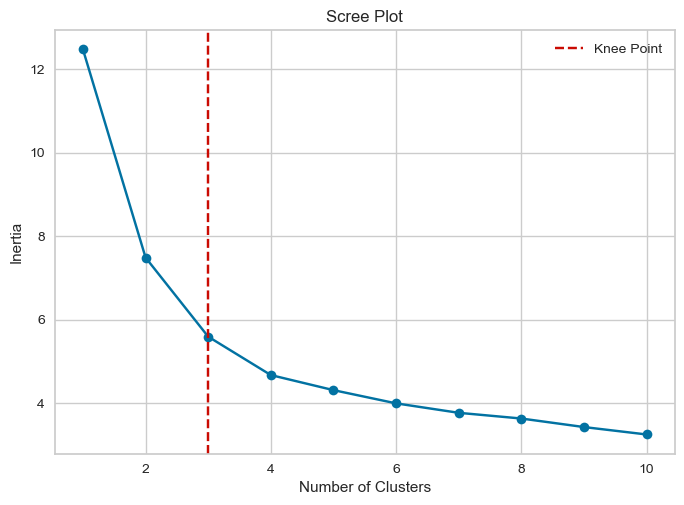

Optimal number of clusters: 3


In [388]:
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
from kmodes.kprototypes import KPrototypes

    # Prepare the data for clustering
# Prepare the data for clustering
clustering_data = product_data[['Product ID', 'Sentiment Score', 'Rating']].copy()
clustering_data['Sentiment Score'] = product_data['Sentiment Score']

# Calculate the within-cluster sum of squares (inertia) for different number of clusters
inertias = []
max_clusters = 10  # Maximum number of clusters to consider
for n_clusters in range(1, max_clusters + 1):
    kproto = KPrototypes(n_clusters=n_clusters, init='Cao', verbose=0)
    clusters = kproto.fit_predict(X=clustering_data.values, categorical=[0])
    inertias.append(kproto.cost_)

# Find the knee point
knee = KneeLocator(range(1, max_clusters + 1), inertias, curve='convex', direction='decreasing')

# Plot the scree plot with knee point
plt.plot(range(1, max_clusters + 1), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Scree Plot')
plt.axvline(x=knee.knee, linestyle='--', color='r', label='Knee Point')
plt.legend()
plt.show()

# Print the optimal number of clusters
optimal_clusters = knee.knee
print(f"Optimal number of clusters: {optimal_clusters}")


In [389]:
import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes

# Prepare the data for clustering
# Prepare the data for clustering
clustering_data = product_data[['Product ID', 'Sentiment Score', 'Rating']].copy()
clustering_data['Sentiment Score'] = product_data['Sentiment Score']

# Specify the number of clusters
n_clusters = 3

# Create an instance of KPrototypes
kproto = KPrototypes(n_clusters=n_clusters, init='Cao', verbose=0)

# Perform clustering
clusters = kproto.fit_predict(X=clustering_data.values, categorical=[0])

# Add cluster labels to the dataframe
product_data['Cluster'] = clusters

# Print the updated dataframe with cluster labels
print(product_data)

# Print the cluster centroids
for i, centroid in enumerate(cluster_centroids):
    print(f"Centroid of cluster {i}: {centroid}")

          Product ID    Rating  Sentiment Score  Cluster
0   itm07490bb5db7f6  3.100000         0.469480        2
1   itm07a34323d2df4  4.000000         0.670267        0
2   itm1292ade728b36  3.800000         0.648500        0
3   itm1560b5e600776  4.500000         0.765375        1
4   itm17e438d18bcb2  4.200000         0.709150        0
5   itm2bf5e001cfa3a  5.000000         0.980850        1
6   itm39e8a57a85d60  4.000000         0.720200        0
7   itm3d222ef44d1ae  4.333333         0.728300        1
8   itm3f354448c3471  3.700000         0.565895        0
9   itm66b9dec475590  5.000000         0.956445        1
10  itm75a1c496ce29a  4.700000         0.662980        1
11  itm809fed4d92865  3.300000         0.491800        2
12  itm97d626d27deca  3.000000         0.720200        2
13  itma7ae24c140feb  4.000000         0.686100        0
14  itmb7e1c175d3f3d  4.400000         0.625160        1
15  itmbd8ba22e92412  4.200000         0.760635        0
16  itmc1e01500cf725  4.222222 

In [390]:
product_data["Cluster"].value_counts()

0    15
1    12
2     3
Name: Cluster, dtype: int64

In [391]:
# Calculate the mean values of Sentiment Score and Rating for each cluster
cluster_stats = product_data.groupby('Cluster')['Sentiment Score', 'Rating'].mean()

# Sort the clusters based on the mean values of Sentiment Score and Rating
sorted_clusters = cluster_stats.sort_values(by=['Sentiment Score', 'Rating'], ascending=False)

# Identify the highly recommended, moderately recommended, and least recommended clusters
highly_recommend_cluster = sorted_clusters.index[0]
moderately_recommend_cluster = sorted_clusters.index[1]
least_recommend_cluster = sorted_clusters.index[-1]

# Print the recommended clusters
print("Most Preferred Products:", highly_recommend_cluster)
print("Moderately Preferred Products:", moderately_recommend_cluster)
print("Least Preferred Products:", least_recommend_cluster)


Most Preferred Products: 1
Moderately Preferred Products: 0
Least Preferred Products: 2


In [392]:
# Map the cluster numbers to category names
category_mapping = {0: 'Low-Rated Selections', 1: 'Hot Picks', 2: 'Well-Liked Items'}
product_data['Category'] = product_data['Cluster'].map(category_mapping)

# Print the updated dataframe
print(product_data)


          Product ID    Rating  Sentiment Score  Cluster              Category
0   itm07490bb5db7f6  3.100000         0.469480        2      Well-Liked Items
1   itm07a34323d2df4  4.000000         0.670267        0  Low-Rated Selections
2   itm1292ade728b36  3.800000         0.648500        0  Low-Rated Selections
3   itm1560b5e600776  4.500000         0.765375        1             Hot Picks
4   itm17e438d18bcb2  4.200000         0.709150        0  Low-Rated Selections
5   itm2bf5e001cfa3a  5.000000         0.980850        1             Hot Picks
6   itm39e8a57a85d60  4.000000         0.720200        0  Low-Rated Selections
7   itm3d222ef44d1ae  4.333333         0.728300        1             Hot Picks
8   itm3f354448c3471  3.700000         0.565895        0  Low-Rated Selections
9   itm66b9dec475590  5.000000         0.956445        1             Hot Picks
10  itm75a1c496ce29a  4.700000         0.662980        1             Hot Picks
11  itm809fed4d92865  3.300000         0.491800     

In [393]:
# Join the dataframes based on Product ID
joined_df = final_df_filtered.merge(product_data, on='Product ID', how='inner')

# Drop the rows present in final_df_filtered but not in product_data
joined_df_filtered = joined_df[joined_df['Product ID'].isin(final_df_filtered['Product ID'])]

# Print the updated dataframe
joined_df_filtered

,Brand,Product Link,Product ID,Product Name,Product Type,Market Price (INR),Discount (%),Current Price (INR),Product Rating,Number of Reviews,Rating,Sentiment Score,Cluster,Category
0,Sharp,https://www.flipkart.com/sharp-air-purifier-ho...,itmbd8ba22e92412,Sharp Air Purifier for Homes & Offices | Dual ...,Car Purifier,"16,500",41,"9,599",4.2,39,4.200000,0.760635,0,Low-Rated Selections
1,Sharp,https://www.flipkart.com/sharp-fp-gm50e-b-air-...,itme695cdf0d44fa,Sharp FP-GM50E-B Air Purifier With Mosquito Ca...,Car Purifier,"33,000",49,"16,756",4.4,3,4.333333,0.708950,1,Hot Picks
2,Sharp,https://www.flipkart.com/sharp-electronics-fpj...,itmc1e01500cf725,Sharp Electronics FPJ30MB Portable Room Air Pu...,Car Purifier,"19,500",48,"9,999",4.3,9,4.222222,0.677094,0,Low-Rated Selections
3,Sharp,https://www.flipkart.com/sharp-air-purifier-de...,itm1560b5e600776,"Sharp Air Purifier & Dehumidifier for Homes, R...",Car Purifier,"42,000",15,"35,569",4.6,4,4.500000,0.765375,1,Hot Picks
4,Sharp,https://www.flipkart.com/sharp-electricals-fp-...,itm39e8a57a85d60,Sharp Electricals FP-J30M-B Air Purifier Porta...,Car Purifier,"18,500",16,"15,500",4,1,4.000000,0.720200,0,Low-Rated Selections
5,Sharp,https://www.flipkart.com/sharp-fp-f40e-t-porta...,itmevzthxqgnzzk3,Sharp FP-F40E-T Portable Room Air Purifier4.41...,Car Purifier,"21,900",51,"10,640",4.4,1,4.000000,0.500000,0,Low-Rated Selections
6,Sharp,https://www.flipkart.com/sharp-air-purifier-fp...,itm2bf5e001cfa3a,Sharp Air Purifier FP-J80M-H for Homes & Offic...,Car Purifier,"39,000",21,"30,600",4.5,1,5.000000,0.980850,1,Hot Picks
7,Sharp,https://www.flipkart.com/sharp-fp-j-30m-b-port...,itmf97yg4kt7kryf,Sharp FP J 30M B Portable Room Air Purifier4.3...,Car Purifier,"19,500",42,"11,155",4.3,4,4.000000,0.613062,0,Low-Rated Selections
8,Sharp,https://www.flipkart.com/sharp-fp-f30e-h-porta...,itmefhpncsgtt6h5,Sharp FP-F30E-H Portable Room Air Purifier4.89...,Car Purifier,"21,000",19,"17,000",4.8,2,4.500000,0.733275,1,Hot Picks
9,Reffair,https://www.flipkart.com/reffair-ax30-max-ioni...,itm66b9dec475590,Reffair AX30 [MAX] - Ionizer with Aromatherapy...,Car Purifier,"4,000",44,"2,224",4.1,291,5.000000,0.956445,1,Hot Picks


In [396]:
# Drop specific columns from the dataframe
columns_to_drop = ['Product Link', 'Product ID', 'Cluster']  # List of column names to drop
product_prefernece = joined_df_filtered.drop(columns=columns_to_drop)

# Print the updated dataframe
product_prefernece


,Brand,Product Name,Product Type,Market Price (INR),Discount (%),Current Price (INR),Product Rating,Number of Reviews,Rating,Sentiment Score,Category
0,Sharp,Sharp Air Purifier for Homes & Offices | Dual ...,Car Purifier,"16,500",41,"9,599",4.2,39,4.200000,0.760635,Low-Rated Selections
1,Sharp,Sharp FP-GM50E-B Air Purifier With Mosquito Ca...,Car Purifier,"33,000",49,"16,756",4.4,3,4.333333,0.708950,Hot Picks
2,Sharp,Sharp Electronics FPJ30MB Portable Room Air Pu...,Car Purifier,"19,500",48,"9,999",4.3,9,4.222222,0.677094,Low-Rated Selections
3,Sharp,"Sharp Air Purifier & Dehumidifier for Homes, R...",Car Purifier,"42,000",15,"35,569",4.6,4,4.500000,0.765375,Hot Picks
4,Sharp,Sharp Electricals FP-J30M-B Air Purifier Porta...,Car Purifier,"18,500",16,"15,500",4,1,4.000000,0.720200,Low-Rated Selections
5,Sharp,Sharp FP-F40E-T Portable Room Air Purifier4.41...,Car Purifier,"21,900",51,"10,640",4.4,1,4.000000,0.500000,Low-Rated Selections
6,Sharp,Sharp Air Purifier FP-J80M-H for Homes & Offic...,Car Purifier,"39,000",21,"30,600",4.5,1,5.000000,0.980850,Hot Picks
7,Sharp,Sharp FP J 30M B Portable Room Air Purifier4.3...,Car Purifier,"19,500",42,"11,155",4.3,4,4.000000,0.613062,Low-Rated Selections
8,Sharp,Sharp FP-F30E-H Portable Room Air Purifier4.89...,Car Purifier,"21,000",19,"17,000",4.8,2,4.500000,0.733275,Hot Picks
9,Reffair,Reffair AX30 [MAX] - Ionizer with Aromatherapy...,Car Purifier,"4,000",44,"2,224",4.1,291,5.000000,0.956445,Hot Picks


In [398]:
# Specify the file path and name for the output Excel file
output_file_path = 'C:/Users/Asus/Downloads/Term 2/Preferrence_Products.xlsx'

# Save the DataFrame to Excel
product_prefernece.to_excel(output_file_path, index=False)  # Set index=False to exclude the row index in the output

print("Output Excel file saved successfully.")


Output Excel file saved successfully.


In [399]:
#!/usr/bin/env python
# coding: utf-8

# In[3]:


import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


# In[17]:


# Load the data
data = product_prefernece

# Add a cluster description column
# cluster_descriptions = {
#     1: "Hot Picks",
#     2: "Well-liked Items",
#     3: "Low-Rated Selections"
# }
# data["Cluster Description"] = data["Category"].map(cluster_descriptions)

# Radio button for cluster selection
selected_cluster = st.sidebar.radio("Select Cluster", options=list(product_prefernece.keys()), index=0)


# Filter the data by selected cluster
filtered_data = data[data["Category"] == selected_cluster]

# Check if any items match the selected cluster
if filtered_data.empty:
    st.write("No items found for the selected cluster.")
else:
    # Display top 10 highest selling items
    top_selling_items = filtered_data.nlargest(10, "flipkart_volumes")
    st.subheader("Top 10 Highest Selling Items:")
    st.dataframe(top_selling_items)

    # Display details of top selling items
    if not top_selling_items.empty:
        selected_item = st.selectbox("Select an item to view details:", options=top_selling_items["Product"])
        selected_item_data = top_selling_items[top_selling_items["Product"] == selected_item]
        st.subheader("Details of Selected Item:")
        st.write(selected_item_data)

    # Display top 10 highest rated items
    top_rated_items = filtered_data.nlargest(10, "Ratings")
    st.subheader("Top 10 Highest Rated Items:")
    st.dataframe(top_rated_items)

    # Display scatter plot of volume vs price, colored by brand
    fig_scatter = px.scatter(filtered_data, x="fli_volumes", y="Price", color="Brand",
                             title="Volume vs Price (Colored by Brand)")
    st.plotly_chart(fig_scatter)
    
    # Trend graph: Flipkart volumes per product
    product_volumes = filtered_data.groupby("Product")["amazon_volumes"].sum()
    fig_volume_trend = px.line(product_volumes, title="Amazon Volumes per Product")
    st.plotly_chart(fig_volume_trend)

    # Graph: Ratings per product
    fig_ratings = px.box(filtered_data, x="Product", y="Ratings", title="Ratings per Product")
    st.plotly_chart(fig_ratings)

    # Visualization: Sentiment per Product
    fig_sentiment = px.scatter(filtered_data, x="Product", y="Sentiment",
                               title="Sentiment per Product", labels={"Product": "Product Name", "Sentiment": "Sentiment Score"})

    st.plotly_chart(fig_sentiment)


    # Search box for keyword filtering
    search_keyword = st.text_input("Search for a keyword:")
    filtered_keyword_data = data[data.apply(lambda row: search_keyword.lower() in row["Product"].lower(), axis=1)]
    st.subheader("Filtered Data:")
    st.dataframe(filtered_keyword_data)
    
    # Select Brands manually
    selected_brands = st.sidebar.multiselect("Select Brands", options=data["Brand"].unique())

    # Filter data by selected brands
    filtered_data = data[data["Brand"].isin(selected_brands)]

    # Scatter plot: Volume vs Price, colored by Cluster
    fig_scatter = px.scatter(filtered_data, x="amazon_volumes", y="Price", color="Cluster", hover_data=["Product"],
                         title="Volume vs Price (Colored by Cluster)")
    st.plotly_chart(fig_scatter)
    
    # Filter by Price slider
    price_min = st.sidebar.slider("Minimum Price", min_value=data["Price"].min(), max_value=data["Price"].max(),
                                  value=data["Price"].min())
    price_max = st.sidebar.slider("Maximum Price", min_value=data["Price"].min(), max_value=data["Price"].max(),
                                  value=data["Price"].max())
    filtered_data = filtered_data[(filtered_data["Price"] >= price_min) & (filtered_data["Price"] <= price_max)]

    # Filter by Rating slider
    rating_min = st.sidebar.slider("Minimum Rating", min_value=data["Ratings"].min(), max_value=data["Ratings"].max(),
                                   value=data["Ratings"].min())
    rating_max = st.sidebar.slider("Maximum Rating", min_value=data["Ratings"].min(), max_value=data["Ratings"].max(),
                                   value=data["Ratings"].max())
    filtered_data = filtered_data[(filtered_data["Ratings"] >= rating_min) & (filtered_data["Ratings"] <= rating_max)]

    # Density volume plot
    fig_density = px.density_heatmap(filtered_data, x="Price", y="Ratings", marginal_x="histogram", marginal_y="histogram",
                                     title="Density Volume of Items")
    st.plotly_chart(fig_density)




2023-06-18 06:56:53.144 
  command:

    streamlit run C:\Users\Asus\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
